In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
texas_e_locs=pd.read_csv('/Users/ads2137/Dropbox/DI/texas_e_locs.csv')
texas_turb_locs=pd.read_csv('/Users/ads2137/Dropbox/DI/texas_turb_locs.csv')
texas_truckstop_locs=pd.read_csv('/Users/ads2137/Dropbox/DI/texas_truckstop_locs.csv')
route35_gas=pd.read_csv('/Users/ads2137/Dropbox/DI/route35_gas.csv')
route20_gas=pd.read_csv('/Users/ads2137/Dropbox/DI/route20_gas.csv')
windplants=pd.read_csv('/Users/ads2137/Dropbox/DI/windplants_locs.csv')

added electrical plants powered by wind to replace wind turbines in modeling 
data from https://www.epa.gov/egrid/data-explorer

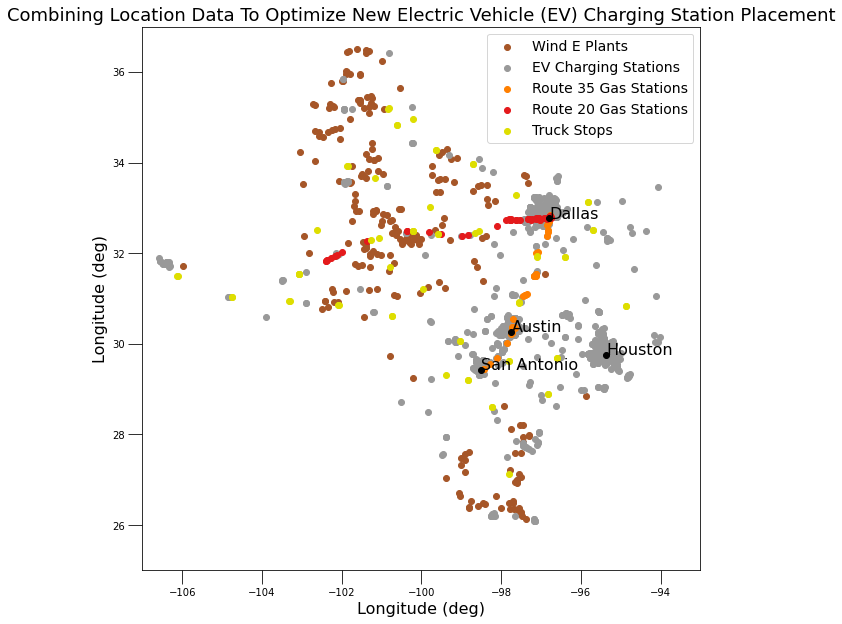

In [3]:
fig,ax=plt.subplots(1,1,figsize=(10,10))

ax.scatter(windplants['xlong'],windplants['ylat'], c='#a65628',label='Wind E Plants')
ax.scatter(texas_e_locs['xlong'],texas_e_locs['ylat'],c='#999999',label='EV Charging Stations')
ax.scatter(route35_gas['xlong'],route35_gas['ylat'],c='#ff7f00',label='Route 35 Gas Stations')
ax.scatter(route20_gas['xlong'],route20_gas['ylat'],c='#e41a1c',label='Route 20 Gas Stations')
ax.scatter(texas_truckstop_locs['xlong'],texas_truckstop_locs['ylat'],c='#dede00',label='Truck Stops')
ax.scatter(-95.3698,29.7604,c='k')
ax.scatter(-96.7970,32.7767,c='k')
ax.scatter(-98.4936,29.4241,c='k')
ax.scatter(-97.7431,30.2672,c='k')
#ax.scatter(,)


plt.annotate('Houston',(-95.3698,29.7604),size=16)
plt.annotate('Dallas',(-96.7970,32.7767),size=16)
plt.annotate('San Antonio',(-98.4936,29.4241),size=16)
plt.annotate('Austin',(-97.7431,30.2672),size=16)


ax.legend(prop={'size': 14})
ax.tick_params(axis='x', size= 14)
ax.tick_params(axis='y', size= 14) 
ax.set_xlabel('Longitude (deg)',size=16)
ax.set_ylabel('Longitude (deg)',size=16)
ax.set_xlim(-107,-93)
ax.set_ylim(25,37)
ax.set_title('Combining Location Data To Optimize New Electric Vehicle (EV) Charging Station Placement',size=18)
#fig.savefig('Truck Stops are more Disperse than Wind Turbines.pdf')
plt.show()


#plot data again truck stop locations

Estimated number of clusters: 11
Estimated number of noise points: 56


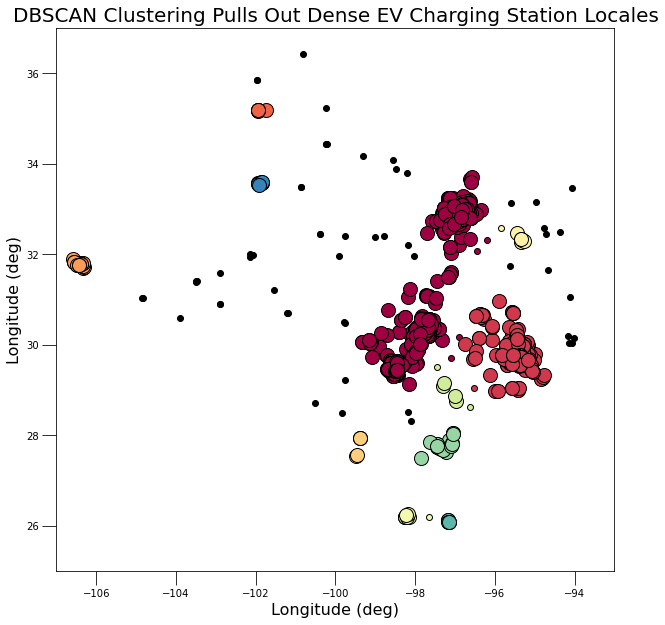

In [4]:
#current EV stations are condensed around major cities
#perform density based clustering to try to pull out dense clusters 
X=texas_e_locs[['xlong', 'ylat']]

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Compute DBSCAN
db = DBSCAN().fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

texas_e_locs['cluster'] = db.labels_



# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)



print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


# # Plot result

fig,ax=plt.subplots(1,1,figsize=(10,10))
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    


    xy = X[class_member_mask & core_samples_mask]
    #print(xy.iloc[:, 0])
    #print(xy[:, 0])
    ax.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    ax.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)
ax.set_title('DBSCAN Clustering Pulls Out Dense EV Charging Station Locales',size=20)
ax.tick_params(axis='x', size= 14)
ax.tick_params(axis='y', size= 14)
ax.set_xlim(-107,-93)
ax.set_ylim(25,37)
ax.set_xlabel('Longitude (deg)',size=16)
ax.set_ylabel('Longitude (deg)',size=16)

#fig.savefig('DBSCAN Clustering Pulls Out Dense EV Charging Station Locations.pdf')
plt.show()

EV charging stations are already dense near major cities, and optimization in urban areas will differ from that of highways. For this project, I will focus on highways, which may also have more access to green energy from wind turbines (and potentially solar panels).
I used DBSCAN clustering as a preliminary means of removing dense clusters of EV charging stations. This analysis groups the EV stations along Route 35 into the largest cluster.

In [5]:
texas_e_locs['cluster'].value_counts()
#seeing how many EV stations are in each cluster and in the noise group (-1)

 0     1253
 1      410
-1       56
 3       25
 8       18
 6        9
 5        8
 10       7
 9        6
 7        6
 2        6
 4        5
Name: cluster, dtype: int64

In [6]:
#e_locs_filtered=texas_e_locs[(texas_e_locs['cluster']!=1) &(texas_e_locs['cluster']!=0)]
e_locs_filtered=texas_e_locs[texas_e_locs['cluster']==-1]
e_locs_filtered['cluster'].value_counts()
#remove densest clusters

-1    56
Name: cluster, dtype: int64

In [7]:
print(len(route20_gas))

58


In [8]:
e_locs_filtered['cluster'].value_counts().sum()

56

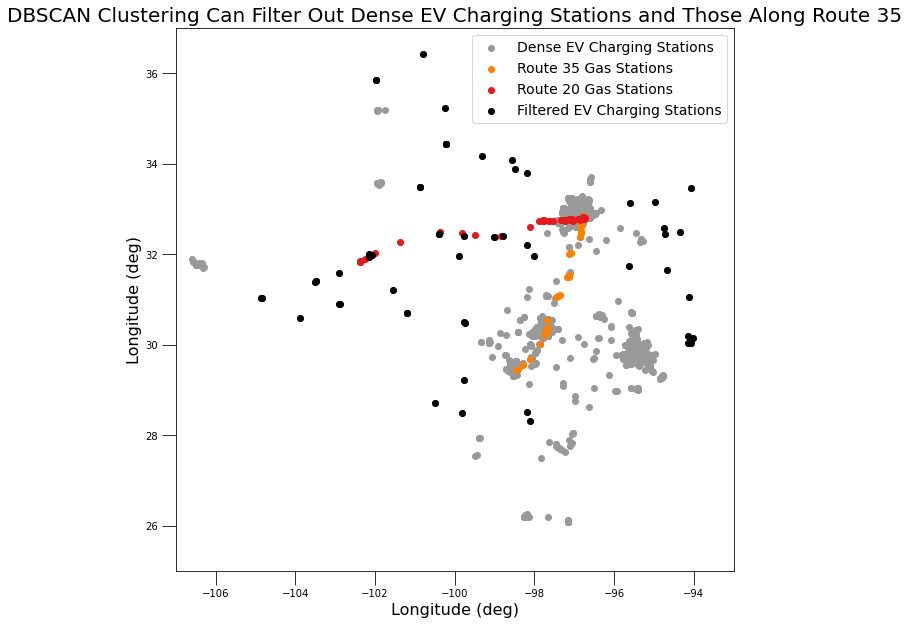

In [9]:
# Remove dense clusters as a means of placing new EV stations in less dense areas
fig,ax=plt.subplots(1,1,figsize=(10,10))

ax.scatter(texas_e_locs['xlong'],texas_e_locs['ylat'],c='#999999',label='Dense EV Charging Stations')

ax.scatter(route35_gas['xlong'],route35_gas['ylat'],c='#ff7f00',label='Route 35 Gas Stations')
ax.scatter(route20_gas['xlong'],route20_gas['ylat'],c='#e41a1c',label='Route 20 Gas Stations')

ax.scatter(e_locs_filtered['xlong'], e_locs_filtered['ylat'],color='k',label='Filtered EV Charging Stations')

ax.legend(prop={'size': 14})
ax.tick_params(axis='x', size= 14)
ax.tick_params(axis='y', size= 14)

ax.set_xlabel('Longitude (deg)',size=16)
ax.set_ylabel('Longitude (deg)',size=16)
ax.set_xlim(-107,-93)
ax.set_ylim(25,37)
ax.set_title('DBSCAN Clustering Can Filter Out Dense EV Charging Stations and Those Along Route 35',size=20)


#fig.savefig('Noise from DBSCAN Clustering Represents Dispersed EV Stations.pdf')
plt.show()

Assuming the existing filtered EV stations have some optimal locations, I will use this data set to target a preliminary linear regression. I will train the data using a randomized subset of the wind turbine, truck stop, and gas station data.

In [10]:
texas_e_locs.value_counts('cluster')
#seeing how many EV stations are in each cluster and in the noise group (-1)

cluster
 0     1253
 1      410
-1       56
 3       25
 8       18
 6        9
 5        8
 10       7
 9        6
 7        6
 2        6
 4        5
dtype: int64

In [11]:
#use filtered EV station as target for linear regression
#route 35 gas stations are limiting, randomize and down sample to model
target=e_locs_filtered[['xlong', 'ylat']].sample(n = len(route35_gas))
#target=e_locs_filtered[['xlong', 'ylat']]
print(len(target))

51


In [12]:
# train_set=pd.DataFrame()
# train_turb=texas_turb_locs.sample(n = len(target))
# train_truck=texas_truckstop_locs.sample(n = len(target))
# train_gas20=route20_gas.sample(n = len(target))
# train_gas35=route35_gas
# #randomize and down sample to match target set length
# train_set['turbine_xlong']=list(train_turb['xlong'])
# train_set['turbine_ylat']=list(train_turb['ylat'])
# train_set['truck_xlong']=list(train_truck['xlong'])
# train_set['truck_ylat']=list(train_truck['ylat'])
# train_set['gas20_xlong']=list(train_gas20['xlong'])
# train_set['gas20_ylat']=list(train_gas20['ylat'])
# train_set['gas35_xlong']=list(train_gas35['xlong'])
# train_set['gas35_ylat']=list(train_gas35['ylat'])

In [13]:
windplants.head()

,Unnamed: 0,xlong,ylat
0,10282,-101.327800,36.472500
1,10287,-100.564280,32.967360
2,10291,-100.209167,29.234722
3,10297,-102.052422,34.769544
4,10301,-100.697290,31.792610


In [14]:
train_set=pd.DataFrame()
train_wind=windplants.sample(n = len(target))
train_truck=texas_truckstop_locs.sample(n = len(target))
train_gas20=route20_gas.sample(n = len(target))
train_gas35=route35_gas
#randomize and down sample to match target set length
train_set['wind_xlong']=list(train_wind['xlong'])
train_set['wind_ylat']=list(train_wind['ylat'])
train_set['truck_xlong']=list(train_truck['xlong'])
train_set['truck_ylat']=list(train_truck['ylat'])
train_set['gas20_xlong']=list(train_gas20['xlong'])
train_set['gas20_ylat']=list(train_gas20['ylat'])
train_set['gas35_xlong']=list(train_gas35['xlong'])
train_set['gas35_ylat']=list(train_gas35['ylat'])

In [15]:
features=['xlong','ylat']
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_set, target)
predictions=reg.predict(train_set)

In [16]:
xlong_predict=[val[0] for val in predictions] 
ylat_predict=[val[1] for val in predictions] 

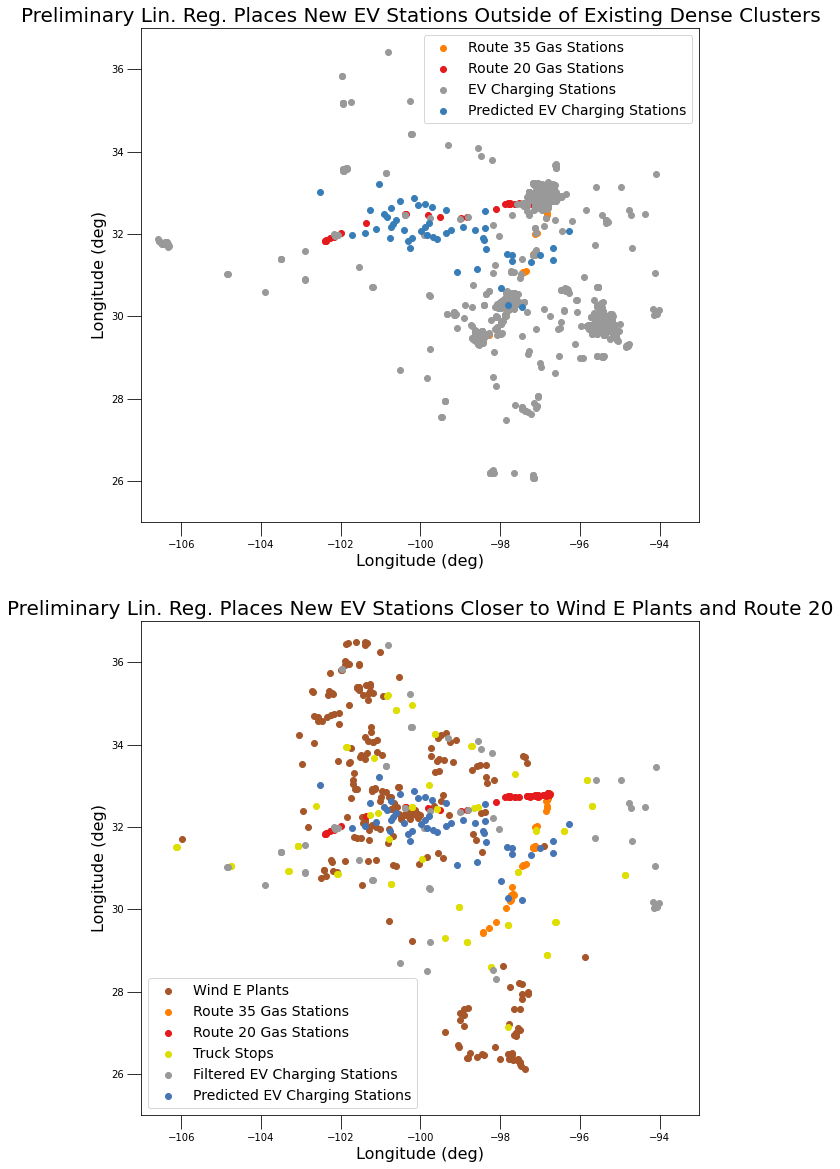

In [17]:
fig,[ax1,ax2]=plt.subplots(2,1,figsize=(10,20))
#ax2.scatter(texas_turb_locs['xlong'],texas_turb_locs['ylat'], c='#a65628',label='Wind Turbines')
ax2.scatter(windplants['xlong'],windplants['ylat'], c='#a65628',label='Wind E Plants')
ax1.scatter(route35_gas['xlong'],route35_gas['ylat'],c='#ff7f00',label='Route 35 Gas Stations')
ax1.scatter(route20_gas['xlong'],route20_gas['ylat'],c='#e41a1c',label='Route 20 Gas Stations')
ax2.scatter(route35_gas['xlong'],route35_gas['ylat'],c='#ff7f00',label='Route 35 Gas Stations')
ax2.scatter(route20_gas['xlong'],route20_gas['ylat'],c='#e41a1c',label='Route 20 Gas Stations')
ax2.scatter(texas_truckstop_locs['xlong'],texas_truckstop_locs['ylat'],c='#dede00',label='Truck Stops')
ax1.scatter(texas_e_locs['xlong'],texas_e_locs['ylat'],c='#999999',label='EV Charging Stations')
ax2.scatter(e_locs_filtered['xlong'], e_locs_filtered['ylat'],c='#999999',label='Filtered EV Charging Stations')
ax2.scatter(xlong_predict, ylat_predict,c='#4575b4',label='Predicted EV Charging Stations')
ax1.scatter(xlong_predict, ylat_predict,c='#377eb8',label='Predicted EV Charging Stations')
ax1.legend(prop={'size': 14})
ax1.tick_params(axis='x', size= 14)
ax1.tick_params(axis='y', size= 14)
ax2.legend(prop={'size': 14})
ax2.tick_params(axis='x', size= 14)
ax2.tick_params(axis='y', size= 14)
ax1.set_xlabel('Longitude (deg)',size=16)
ax1.set_ylabel('Longitude (deg)',size=16)
ax2.set_xlabel('Longitude (deg)',size=16)
ax2.set_ylabel('Longitude (deg)',size=16)
ax1.set_xlim(-107,-93)
ax1.set_ylim(25,37)
ax2.set_xlim(-107,-93)
ax2.set_ylim(25,37)
ax1.set_title('Preliminary Lin. Reg. Places New EV Stations Outside of Existing Dense Clusters',size=20)
ax2.set_title('Preliminary Lin. Reg. Places New EV Stations Closer to Wind E Plants and Route 20',size=20)
#fig.savefig('Preliminary Lin. Reg.pdf',format='pdf', dpi=1000, bbox_inches='tight')
plt.show()

This preliminary analysis indicates that machine learning approaches can associate locations of EV charging stations with green energy sources and heavily trafficked roadways and place them outside of dense clusters of existing stations. While these initial predicted locations may not be immediately useful, additional calculations that take into account variables such as the distances of gas stations from highways, the distance of green energy sources from the locations they ultimately power, and EV battery life (in comparison to how far vehicles normall travel between gas stations) can improve this technique. Additionally, improving the clustering and machine learning methods used will lead to more accurate results.